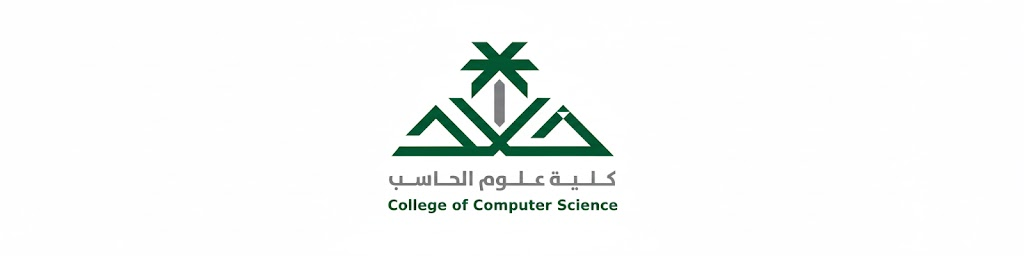

# Natural Language Processing (NLP)
# First: Text Pre-Processing

---

## 🔍 What is Natural Language Processing?

**Natural Language Processing (NLP)** is a branch of Artificial Intelligence (AI) that focuses on enabling computers to understand, interpret, and generate human language in a meaningful and useful way.

It combines:
- **Computational Linguistics**
- **Machine Learning**
- **Deep Learning**

to process and analyze large amounts of natural language data.

### 🎯 Key Objectives of NLP:
- **Understanding**: Extracting meaning from language.
- **Generation**: Producing human-like text.
- **Translation**: Converting text between languages.
- **Interaction**: Facilitating natural human-computer communication.

---

## 📝 Core NLP Terminology

### 📚 Fundamental Concepts

| Term            | Description                                                                                  | Example                              |
|-----------------|----------------------------------------------------------------------------------------------|--------------------------------------|
| **Corpus**      | A large collection of texts used for training NLP models.                                     | Brown Corpus, Reuters Corpus         |
| **Token**       | The smallest unit of text (word, character, or subword) obtained after tokenization.          | "Hello world!" → `["Hello", "world", "!"]` |
| **Tokenization**| The process of breaking text into tokens.                                                     | Input: "It's great!" → `["It", "'s", "great", "!"]` |
| **Vocabulary**  | The set of unique tokens in a corpus (also called lexicon).                                   | {"Hello", "world", "!"}              |

### 💡 Notes:
- Tokenization can be complex due to punctuation, contractions, and language-specific rules.
- The size of the vocabulary can impact both model performance and resource requirements.

---

#### ❓ **Quick Question:** Why do you think these fundamental concepts like 'Tokenization' and 'Corpus' are so crucial before we even start building an NLP model? What problems might arise without them?

## 🚀 Getting Started with NLTK and spaCy

Now that we understand the theoretical foundations of NLP, let’s dive into practical implementation using two of the most popular NLP libraries: **NLTK** and **spaCy**.

---

### 🐍 NLTK (Natural Language Toolkit)

**NLTK** is a comprehensive Python library designed for working with human language data. It provides simple interfaces to over 50 corpora and lexical resources and is widely used in education, research, and rapid prototyping.

#### ⭐ Key Features of NLTK:
- 📚 Extensive collection of text processing libraries
- 🗂️ Built-in corpora and datasets for experimentation
- 🎓 Educational focus with detailed tutorials and documentation
- 🔍 Wide range of algorithms for:
  - Tokenization
  - Stemming
  - Tagging
  - Parsing
  - Classification
  - Semantic reasoning

---

# 1- **NLTK Installation**

Before we can use NLTK, we need to install it. The `!pip install nltk` command below does exactly that. The `!` at the beginning tells Colab to run this as a shell command, not Python code.

---

In [ ]:
# Let's install NLTK! This command fetches the library and makes it available for us to use.
!pip install nltk

# After running, you'll see messages about the installation. If it says 'Requirement already satisfied', that means NLTK is already installed and ready to go!

In [ ]:
# Here, we're defining a string variable called `sample_text`. This will be our playground for English NLP tasks.
sample_text = """
Natural Language Processing is a fascinating field that combines linguistics,
computer science, and artificial intelligence. It enables computers to understand,
interpret, and generate human language in a meaningful way. NLP has revolutionized
how we interact with technology, from search engines to chatbots.
"""

# And another one for Arabic, demonstrating NLTK's multi-language capabilities!
sample_text_arabic = """
جامعة الملك عبدالله للعلوم والتقنية هي جامعة بحثية متطورة تقع في المملكة العربية السعودية.
تأسست الجامعة عام 2009 وتهدف إلى أن تكون منارة للعلم والمعرفة في المنطقة والعالم.
تضم الجامعة أحدث المختبرات والمرافق البحثية، وتجذب الطلاب والباحثين من جميع أنحاء العالم.
تتميز كاوست بتركيزها على البحث العلمي والابتكار في مجالات متعددة مثل الهندسة والعلوم الطبيعية
والحاسوب والذكاء الاصطناعي. تسعى الجامعة لحل التحديات العالمية من خلال البحث والتطوير.
"""

## ✂️ 2. **Tokenization Function**

**Tokenization** is the process of splitting text into smaller meaningful units called **tokens**. These tokens are often words, subwords, or even characters, depending on the task.

Tokenization is usually the **first step in text preprocessing** because most NLP models require structured input instead of raw text.

---

### 💡 Why is Tokenization Important?

- ✅ Converts unstructured text into manageable pieces
- ✅ Enables word-level feature extraction and analysis
- ✅ Impacts vocabulary size and downstream model performance

---

In [ ]:
import nltk
from nltk.tokenize import word_tokenize, sent_tokenize # These are the functions we'll use for tokenization
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.tag import pos_tag
from nltk.sentiment import SentimentIntensityAnalyzer

# NLTK often requires downloading specific data packages (corpora) for its functions to work.
# 'punkt' is a pre-trained tokenizer for many languages.
# We download it once, and then it's available for future use.
nltk.download('punkt')
nltk.download('punkt_tab') # This one is less common but included here.

In [ ]:
# Now, let's tokenize our `sample_text`!

# `word_tokenize` breaks the text into individual words and punctuation marks.
words = word_tokenize(sample_text)

# `sent_tokenize` breaks the text into individual sentences.
sentences = sent_tokenize(sample_text)

# Let's see the results!
print ("Tokens (words and punctuation):")
print (words)
print ("\nSentences:")
print (sentences)

# And some statistics!
print(f"\nNumber of word tokens: {len(words)}")
print(f"Number of sentences: {len(sentences)}")

In [ ]:
# Let's apply the same tokenization to our Arabic sample text to see how it handles different languages.

Arabic_words = word_tokenize(sample_text_arabic)
Arabic_sentences = sent_tokenize(sample_text_arabic)

print ("Arabic Word Tokens:")
print (Arabic_words)
print ("\nArabic Sentences:")
print (Arabic_sentences)

print(f"\nNumber of Arabic word tokens: {len(Arabic_words)}")
print(f"Number of Arabic sentences: {len(Arabic_sentences)}")


#### 🤔 **Your Turn:** Try tokenizing a sentence of your own!
# Create a new string variable, for example: `my_text = "Hello, how are you today? I'm learning NLP!"`
# Then use `word_tokenize(my_text)` and `sent_tokenize(my_text)` to see the results.
# What differences do you notice between word and sentence tokenization?


## 🚫 3. Stop Words Removal Function

**Stop words** are commonly used words in a language that carry little meaningful information for NLP tasks. Examples include:  
**"the"**, **"is"**, **"in"**, **"and"**, **"on"**, etc.

Removing stop words is a common preprocessing step that helps:
- 🧹 Reduce noise in the data
- 📉 Decrease vocabulary size
- 🚀 Improve model efficiency and focus on important words

---

In [ ]:
import nltk
# Just like 'punkt', NLTK needs a list of stop words for each language. Let's download the English one.
nltk.download('stopwords')

# We load the English stop words into a set for fast lookup.
stop_words = set(stopwords.words('english'))

# Now we create a new list of words, excluding stop words and keeping only alphabetic tokens.
# We convert words to lowercase (`word.lower()`) to ensure consistent comparison with the stop words list.
filtered_words = [word.lower() for word in words if word.lower() not in stop_words and word.isalpha()]

print(f"Original number of word tokens: {len(words)}")
print(f"Number of word tokens after removing stop words: {len(filtered_words)}")
print(f"Filtered words (first 20): {filtered_words[:20]}...")


#### ✍️ **Small Task:** Can you think of a scenario where removing stop words might *not* be a good idea? (Hint: consider tasks where sentence structure or very common words carry specific meaning).

In [ ]:
# Let's do the same for Arabic! NLTK has stop words for many languages.

stop_words_arabic = set(stopwords.words('arabic'))
Arabic_filtered_words = [word.lower() for word in Arabic_words if word.lower() not in stop_words_arabic and word.isalpha()]

print(f"Original number of Arabic word tokens: {len(Arabic_words)}")
print(f"Number of Arabic word tokens after removing stop words: {len(Arabic_filtered_words)}")
print(f"Filtered Arabic words (first 20): {Arabic_filtered_words[:20]}...")

## 🌱 4. **Stemming Function**

**Stemming** is the process of reducing words to their **base or root form** by removing suffixes and prefixes. The resulting stem may not always be a valid word but represents a group of related words.

Example:  
`"running"`, `"runner"`, `"runs"` → `"run"`

---

### 💡 Why is Stemming Useful?

- ✅ Reduces different forms of a word to a common base
- ✅ Helps in grouping words with similar meaning
- ✅ Decreases vocabulary size and improves generalization

---


In [ ]:
from nltk.stem import PorterStemmer # Porter Stemmer is a popular algorithm for English stemming.

stemmer = PorterStemmer()

# We apply the stemmer to each word token we obtained earlier.
stemmed_words = [stemmer.stem(word) for word in words]

print("Original words (first 15):")
print(words[:15])
print("\nStemmed words (first 15):")
print(stemmed_words[:15])


#### ❓ **Consider This:** Look at the stemmed words. Do all of them look like actual English words? What does this tell us about stemming?

In [ ]:
from nltk.stem.isri import ISRIStemmer # NLTK also has stemmers for other languages, like ISRIStemmer for Arabic.

# Arabic stemmer initialization
stemmer_arabic = ISRIStemmer()

# We stem the filtered Arabic words (after stop word removal).
Arabic_stemmed_words = [stemmer_arabic.stem(word) for word in Arabic_filtered_words]

print(f"Original Arabic words (first 10): {Arabic_filtered_words[:10]}")
print(f"Stemmed Arabic words (first 10): {Arabic_stemmed_words[:10]}")

## 🍃 5-**Lemmatization Function**

**Lemmatization** is the process of reducing words to their **dictionary base form** (called the *lemma*) while ensuring the result is a **valid word**. Unlike stemming, lemmatization uses **context and vocabulary** to produce meaningful roots.

Example:  
`"running"` → `"run"`  
`"better"` → `"good"`

---

### 💡 Why Use Lemmatization?

- ✅ Produces linguistically correct root words
- ✅ Considers **part of speech (POS)** for accurate results
- ✅ More precise than stemming, especially in formal NLP tasks

---


In [ ]:
import nltk
# For lemmatization, NLTK needs WordNet, a large lexical database of English.
nltk.download('wordnet')

# Initialize the WordNet Lemmatizer.
lemmatizer = WordNetLemmatizer()

# Apply lemmatization to our original English word tokens.
lemmatized_words = [lemmatizer.lemmatize(word) for word in words]

print("Original words (first 15):")
print(words[:15])
print("\nLemmatized words (first 15):")
print(lemmatized_words[:15])


#### 👯 **Compare & Contrast:** Look at the output of stemming and lemmatization for `words` like 'combines', 'computers', 'revolutionized'. What are the key differences you observe, and why might one be preferred over the other in certain NLP tasks?

# 6-**Part-of-Speech Tagging**

**Part-of-Speech (POS) Tagging** is the process of labeling each word in a sentence with its **grammatical role** such as noun, verb, adjective, etc.

POS tagging is essential in NLP for understanding sentence structure, syntactic parsing, named entity recognition, and more.

---

## 📝 Part-of-Speech (POS) Tags Reference

| Tag   | Meaning                             | Example Words            |
|-------|-------------------------------------|--------------------------|
| **CC**   | Coordinating conjunction            | and, but, or             |
| **CD**   | Cardinal number                    | one, two, 1, 2           |
| **DT**   | Determiner                         | the, a, an               |
| **EX**   | Existential 'there'                | there (as in *there is*) |
| **FW**   | Foreign word                       | bonjour, sayonara        |
| **IN**   | Preposition or subordinating conj. | in, of, like, after      |
| **JJ**   | Adjective                          | big, blue, smart         |
| **JJR**  | Adjective, comparative             | bigger, smarter          |
| **JJS**  | Adjective, superlative             | biggest, smartest        |
| **LS**   | List item marker                   | 1., A, B                 |
| **MD**   | Modal verb                         | can, could, will, would  |
| **NN**   | Noun, singular                     | cat, house, idea         |
| **NNS**  | Noun, plural                       | cats, houses, ideas      |
| **NNP**  | Proper noun, singular              | John, London, Apple      |
| **NNPS** | Proper noun, plural                | Americans, Smiths        |
| **PDT**  | Predeterminer                      | all, both, half          |
| **POS**  | Possessive ending                  | 's (as in *John's*)      |
| **PRP**  | Personal pronoun                   | I, he, she, it           |
| **PRP$** | Possessive pronoun                 | my, his, her, its        |
| **RB**   | Adverb                             | quickly, very, well      |

---

## 📌 Quick Reference for Common POS Categories

| Category        | POS Tags                          | Examples              |
|-----------------|-------------------------------------|-----------------------|
| **Nouns**       | NN, NNS, NNP, NNPS                 | cat, London, ideas    |
| **Verbs**       | VB, VBD, VBG, VBN, VBP, VBZ        | run, ran, running     |
| **Adjectives**  | JJ, JJR, JJS                       | blue, smarter, biggest |
| **Adverbs**     | RB, RBR, RBS                       | quickly, more, most   |
| **Pronouns**    | PRP, PRP$, WP, WP$                 | he, she, whose        |
| **Determiners** | DT, WDT                            | the, which            |
| **Prepositions**| IN                                  | in, on, after         |
| **Conjunctions**| CC                                  | and, but, or          |

---

In [ ]:
import nltk
# To perform POS tagging, NLTK needs a pre-trained tagger. 'averaged_perceptron_tagger' is a common one.
nltk.download('averaged_perceptron_tagger_eng') # This downloads the English version.

# The `pos_tag()` function takes a list of words (tokens) and returns a list of (word, tag) tuples.
pos_tags = pos_tag(words)

print("POS Tags for our English sample text:")
print(pos_tags)


#### 🕵️‍♀️ **Mini-Challenge:** From the `pos_tags` output, find an example of each of these:
# 1.  A Proper Noun, Singular (`NNP`)
# 2.  A Verb, Third person singular present (`VBZ`)
# 3.  An Adjective (`JJ`)




# 😊 7- Sentiment Analysis

**Sentiment Analysis** is the process of identifying and categorizing emotions or opinions expressed in a piece of text—typically as **positive**, **negative**, or **neutral**.

In **NLTK**, we can perform sentiment analysis using the built-in **VADER** sentiment analyzer, which is particularly effective for short texts like social media posts.
## ❓ Why is it Called **VADER**?

**VADER** stands for:

> **V**alence **A**ware **D**ictionary and s**E**ntiment **R**easoner

---

### 💡 What Does That Mean?

- **Valence**: The **emotional value** of a word or phrase (positive, negative, or neutral).
- **Aware**: It considers not just the words, but also how they are used in context.
- **Dictionary**: Uses a **predefined lexicon** of words with associated sentiment scores.
- **Sentiment Reasoner**: Applies **rules** to adjust sentiment based on:
  - Punctuation (e.g., “!!!” adds intensity)
  - Capitalization (e.g., “LOVE” is stronger than “love”)
  - Degree modifiers (e.g., “very good” vs. “good”)
  - Emojis and emoticons (e.g., 😊 😢)

---

In [ ]:
import nltk
# VADER needs its specific lexicon to work.
nltk.download('vader_lexicon')

# First, we define a function to encapsulate our sentiment analysis logic.
def nltk_sentiment_analysis(text):
    """Analyze sentiment of text"""
    print("=== SENTIMENT ANALYSIS ===")
    sia = SentimentIntensityAnalyzer() # Initialize the VADER sentiment analyzer.
    sentiment_scores = sia.polarity_scores(text) # Get the sentiment scores.

    # VADER returns four scores:
    # 'neg': negative sentiment
    # 'neu': neutral sentiment
    # 'pos': positive sentiment
    # 'compound': a normalized, weighted composite score (from -1 to +1) that indicates the overall sentiment.
    print(f"Sentiment scores: {sentiment_scores}")

    # We interpret the compound score to classify the overall sentiment.
    if sentiment_scores['compound'] >= 0.05:
        print("Overall sentiment: Positive")
    elif sentiment_scores['compound'] <= -0.05:
        print("Overall sentiment: Negative")
    else:
        print("Overall sentiment: Neutral")

    return sentiment_scores

# Let's run the function on our `sample_text`!
sentiment_scores = nltk_sentiment_analysis(sample_text)


#### ✨ **Experiment:** Try running `nltk_sentiment_analysis()` on a different sentence that you know is clearly positive or negative. For example:
# `nltk_sentiment_analysis("This is an absolutely amazing and fantastic tool!")`
# `nltk_sentiment_analysis("I hate this terrible, awful weather.")`
# How do the 'pos', 'neg', and 'compound' scores change?

## 🚀 **8-spaCy**

**spaCy** is an **industrial-strength Natural Language Processing (NLP) library** built for **production-level applications**. It is known for being **fast, efficient, and accurate**, with easy integration into real-world systems.

---

### ⭐ Key Features of spaCy:

- ⚡ **High Performance:** Optimized for speed and large-scale processing.
- 🌐 **Pre-trained Models:** Supports multiple languages (English, Arabic, German, etc.).
- 🧠 **Deep Learning Ready:** Seamless integration with deep learning frameworks (e.g., PyTorch, TensorFlow).
- 🏗️ **Production Focused:** Designed for real-world use, not just research or prototyping.
- 🔗 **Advanced NLP Tasks:**
  - **Tokenization**
  - **Part-of-Speech Tagging (POS)**
  - **Dependency Parsing**
  - **Named Entity Recognition (NER)**
  - **Text Classification**

---

#### 🤔 **Think About It:** Based on its description, in what kind of real-world applications would `spaCy` be a better choice than `NLTK`, and vice-versa? What are the main strengths of each library?

# 9-**spaCy Installation**

Similar to NLTK, spaCy needs to be installed. We'll use `pip install spacy` to get the core library.

In [ ]:
!pip install spacy

# After installing spaCy, we also need to download a language model. `en_core_web_sm` is a small English model.
# It provides trained pipelines for various NLP tasks like tokenization, POS tagging, NER, and dependency parsing.
!python -m spacy download en_core_web_sm

# Once installed, it's ready to be loaded and used.

In [ ]:
import spacy
from spacy import displacy # displacy is a useful tool for visualizing spaCy's output.

# We load the downloaded English model. This `nlp` object is our main entry point for spaCy operations.
nlp = spacy.load("en_core_web_sm")

# When you pass text to the `nlp` object, it processes it through its pipeline (tokenization, tagging, parsing, NER).
# The result is a `Doc` object, which is a container for all the processed information.
doc = nlp(sample_text)

print("spaCy has processed the text!")
print(f"Number of tokens in spaCy doc: {len(doc)}")
print(f"First 5 tokens: {[token.text for token in doc[:5]]}")

# 🏷️ 10. Named Entity Recognition (NER)

## 📌 What is Named Entity Recognition (NER)?

**Named Entity Recognition (NER)** is a key task in Natural Language Processing (NLP) where the goal is to **automatically detect and classify named entities** in text into predefined categories such as:
- **Persons**
- **Organizations**
- **Locations**
- **Dates**
- **Monetary values**
- And more...

NER is useful in a variety of applications including:
- 📊 **Information extraction**
- 🔎 **Search engines**
- 📰 **News analysis**
- 📈 **Business intelligence**
- 💬 **Chatbots and conversational agents**

---

## 📝 How Does NER Work in spaCy?

- spaCy's pre-trained models can **identify named entities** directly from raw text.
- Entities are returned with:
  - **The text span** (e.g., `"Apple"`)
  - **The entity type** (e.g., `ORG` for Organization)

---

In [ ]:
import spacy

# Load the spaCy English model once (we already did this in the previous cell, but it's good practice to ensure it's loaded if this cell were run independently)
nlp = spacy.load("en_core_web_sm")

def detailed_ner_analysis(text):
    """
    Perform Named Entity Recognition (NER) on the given text using spaCy.
    Displays entities with their labels and explanations, along with token details.
    """
    doc = nlp(text) # Process the text with the loaded spaCy model.

    print("\n=== NAMED ENTITY RECOGNITION (NER) ===")
    print(f"📄 Text length: {len(text)} characters")
    print(f"🔢 Number of tokens: {len(doc)}")
    print(f"🔍 Number of entities found: {len(doc.ents)}\n")

    if doc.ents: # Check if any entities were found.
        print("🗂 Entities Found:")
        for ent in doc.ents: # Iterate through each detected entity.
            # `ent.text` is the actual text of the entity.
            # `ent.label_` is the type of the entity (e.g., ORG, GPE).
            # `spacy.explain(ent.label_)` provides a human-readable description of the label.
            label_desc = spacy.explain(ent.label_) or "No description available"
            print(f"- {ent.text}  ➔  {ent.label_} ({label_desc})")
    else:
        print("No entities detected in the text.")

    print("\n🔠 First 10 Tokens (with POS and Entity Type):")
    for token in doc[:10]: # Iterate through the first 10 tokens in the processed document.
        # `token.text` is the word itself.
        # `token.pos_` is its Part-of-Speech tag.
        # `token.ent_type_` is the entity type if the token is part of a named entity, otherwise empty.
        ent_type = token.ent_type_ if token.ent_type_ else "None"
        print(f"{token.text:<15} | {token.pos_:<10} | {ent_type}")

    return doc.ents


# Let's run the NER analysis on our sample text!
entities = detailed_ner_analysis(sample_text)


#### 🚀 **Your Turn:** Try using `detailed_ner_analysis()` on a different sentence, perhaps one that includes names of people, organizations, or locations. For example:
# `detailed_ner_analysis("Apple Inc. was founded by Steve Jobs in California.")`
# What entities does spaCy identify?

# 🔗 11-Dependency Parsing - Common Dependency Relations

## 📌 What is Dependency Parsing?

**Dependency Parsing** is the process of analyzing the **grammatical structure** of a sentence by identifying relationships between words. Each word (token) is connected to another word called its **head**, forming a tree-like structure.

✅ Every word has:
- A **head word** it depends on (except the root word)
- A **dependency relation** that explains the grammatical link

---

## 🗂️ Common Dependency Relations

| Dependency | Full Name                    | Description                                  | Example (Relation)                   |
|-----------|------------------------------|----------------------------------------------|--------------------------------------|
| **ROOT**   | Root                          | Main verb or predicate of the sentence        | "runs" in "John runs fast"           |
| **nsubj**  | Nominal subject               | Subject of the verb                          | "John" → "runs"                      |
| **nsubjpass** | Passive nominal subject     | Subject of passive verb                      | "cake" in "The cake was eaten"       |
| **dobj**   | Direct object                 | Direct object of the verb                    | "ball" in "John threw the ball"      |
| **iobj**   | Indirect object               | Indirect object of the verb                  | "him" in "I gave him the book"       |
| **amod**   | Adjectival modifier          | Adjective modifying a noun                   | "red" → "car"                        |
| **advmod** | Adverbial modifier           | Adverb modifying verb/adj/adv                | "quickly" → "runs"                   |
| **det**    | Determiner                   | Article or determiner                        | "the" → "book"                       |
| **prep**   | Prepositional modifier       | Preposition linking to object                | "in" in "in the house"               |
| **pobj**   | Object of preposition        | Object of the preposition                    | "house" in "in the house"            |
| **aux**    | Auxiliary                    | Helping verb                                 | "is" in "is running"                 |
| **auxpass** | Passive auxiliary            | Passive helping verb                         | "was" in "was eaten"                 |
| **cop**    | Copula                       | Linking verb (be, seem, etc.)                | "is" in "John is tall"               |
| **cc**     | Coordinating conjunction     | And, or, but                                 | "and" in "cats and dogs"             |
| **conj**   | Conjunct                     | Coordinated element                          | "dogs" in "cats and dogs"            |
| **compound** | Compound                    | Modifier in compound words                   | "ice" → "cream"                      |
| **poss**   | Possessive modifier          | Possessive noun or pronoun                   | "John's" → "book"                    |
| **appos**  | Appositional modifier        | Noun phrase renaming another noun            | "CEO" in "John, the CEO"             |
| **acl**    | Adjectival clause            | Clause modifying a noun                      | "who runs" in "man who runs"         |
| **advcl**  | Adverbial clause             | Clause modifying verb or adjective           | "when he arrived"                   |
| **ccomp**  | Clausal complement           | Clause functioning as object                 | "that he left" in "I think that..."  |
| **xcomp**  | Open clausal complement      | Non-finite clause complement                 | "to run" in "I want to run"          |
| **mark**   | Marker                       | Subordinating conjunction                    | "that" in "I know that..."           |
| **punct**  | Punctuation                  | Punctuation marks                            | ".", "!", "?"                        |
| **neg**    | Negation modifier            | Negation word                                | "not" in "do not run"                |
| **prt**    | Particle                     | Verb particle                                | "up" in "give up"                    |
| **quantmod** | Quantifier modifier         | Quantifier                                    | "very" in "very good"                |
| **npadvmod** | Noun phrase adverbial modifier | Noun used adverbially                        | "today" in "I'll go today"           |
| **tmod**   | Temporal modifier            | Time expression                              | "yesterday"                          |
| **nummod** | Numeric modifier             | Numeric expression                           | "five" in "five books"               |
| **number** | Number compound              | Part of complex number                       | "twenty" in "twenty-five"            |
| **parataxis** | Parataxis                  | Parallel clauses                             | Quoted or separate sentences         |
| **dep**    | Unspecified dependency       | Fallback relation when parser is unsure      | Miscellaneous links                  |

---

## 📝 Example Dependency Analysis

**Sentence**:  
*“The quick brown fox jumps over the lazy dog.”*

| Token  | Dependency | Head   | Explanation                          |
|--------|------------|--------|--------------------------------------|
| The    | det        | fox    | Determiner modifies "fox"            |
| quick  | amod       | fox    | Adjective modifies "fox"             |
| brown  | amod       | fox    | Adjective modifies "fox"             |
| fox    | nsubj      | jumps  | Subject of the verb                  |
| jumps  | ROOT       | jumps  | Main verb                            |
| over   | prep       | jumps  | Preposition attached to "jumps"      |
| the    | det        | dog    | Determiner modifies "dog"            |
| lazy   | amod       | dog    | Adjective modifies "dog"             |
| dog    | pobj       | over   | Object of the preposition "over"     |

---

## 🔑 Key Concepts in Dependency Parsing

### 🔗 Head vs. Dependent:
- **Head**: The main word that governs the relation (e.g., verb or noun).
- **Dependent**: The word that is attached to and modifies the head.

### 🔄 Common Grammar Patterns:
| Pattern           | Example                             |
|-------------------|-------------------------------------|
| **Subject-Verb**  | `nsubj → ROOT`                      |
| **Verb-Object**   | `ROOT → dobj`                       |
| **Adj-Noun**      | `amod → noun`                       |
| **Det-Noun**      | `det → noun`                        |
| **Prep-Object**   | `prep → pobj`                       |

### 🌳 ROOT Token:
- Every sentence has **one ROOT**.
- It is usually the **main verb**.
- All other tokens connect back to this ROOT.

---

## ⚙️ Applications of Dependency Parsing:
- 🔍 **Information Extraction:** Find key actors (subjects) and actions (verbs).
- ❓ **Question Answering:** Identify important relationships for precise answers.
- ✂️ **Text Summarization:** Understand structure for better summarization.
- 🌐 **Machine Translation:** Preserve grammatical correctness across languages.

---

In [ ]:
import spacy

# Load spaCy model and process text (we ensure it's loaded)
nlp = spacy.load("en_core_web_sm")

def spacy_dependency_parsing(text):
    """Show dependency relationships using spaCy"""
    # Process the text through spaCy pipeline
    doc = nlp(text)

    print("=== DEPENDENCY PARSING ===")
    print("Token -> Dependency -> Head:")

    count = 0
    for token in doc:
        if token.is_alpha:  # We only show alphabetic tokens for clarity in this example
            # `token.text` is the current word.
            # `token.dep_` is the dependency relation type (e.g., 'nsubj', 'dobj').
            # `token.head.text` is the text of the word that the current token depends on.
            print(f"{token.text:15} | {token.dep_:10} | {token.head.text}")
            count += 1
            if count >= 10:  # Limit to first 10 tokens for brevity
                break

    return doc

# Let's run the dependency parsing on our sample text!
doc_dep = spacy_dependency_parsing(sample_text)


#### 🧠 **Challenge Question:** Look at the dependency output for the `sample_text`. Can you identify:
1.  The `ROOT` token and what word it is?
2.  A `nsubj` (nominal subject) dependency, and which word is the subject of which head?

If you want to visualize this better, `displacy` is excellent for that! You can try `displacy.render(doc_dep, style="dep", jupyter=True)` in a new cell after running this one.

# 🔍 12. Text Similarity

## 📌 What is Text Similarity?

**Text Similarity** measures how **similar or related two pieces of text are**. This is a fundamental task in NLP used in various applications such as:
- 📑 **Duplicate detection** (e.g., finding similar questions in forums)
- 🔎 **Information retrieval** (e.g., ranking search results)
- 💬 **Chatbots and conversational agents**
- 📄 **Plagiarism detection**

spaCy provides a simple way to compute **semantic similarity** between words, sentences, or entire documents using **word vectors** or **statistical models**.

---

In [ ]:
import spacy

# Note: For robust similarity calculations, spaCy often recommends using larger models (e.g., `en_core_web_md` or `en_core_web_lg`)
# because these include word vectors, which are crucial for semantic similarity. The `_sm` model has limited vector data.
# If you encounter a warning about 'no word vectors loaded', that's why! We will still proceed to demonstrate the function.

nlp = spacy.load("en_core_web_sm") # Ensuring the model is loaded

def spacy_text_similarity(nlp_model):
    """Calculate similarity between texts"""
    try:
        # Two sample texts that are semantically related.
        doc1 = nlp_model("Apple is a technology company")
        doc2 = nlp_model("Microsoft is a software company")

        # spaCy's `similarity()` method calculates the cosine similarity between the document vectors.
        similarity = doc1.similarity(doc2)

        print("=== TEXT SIMILARITY ===")
        print(f"Text 1: {doc1.text}")
        print(f"Text 2: {doc2.text}")
        print(f"Similarity: {similarity:.3f}") # Display similarity to 3 decimal places.

        return similarity

    except Exception as e:
        print("Error: Need a spaCy model with word vectors for best similarity results.")
        print("Try installing 'en_core_web_md' or 'en_core_web_lg' models. Example: `!python -m spacy download en_core_web_md`")
        return None

# Run the function
similarity = spacy_text_similarity(nlp)


#### 🌟 **Creative Task:** How similar are these two sentences?
# `sentence_a = nlp("The cat sat on the mat.")`
# `sentence_b = nlp("A feline rested on a rug.")`
# Calculate their similarity using the same `.similarity()` method. Do the results surprise you? Why or why not?



### Contributed by: Lama Ayash

---


## References and Further Reading

1.  **Natural Language Toolkit (NLTK)**: https://www.nltk.org/
    - Python library with extensive NLP tools and datasets

2.  **spaCy**: https://spacy.io/
    - Industrial-strength NLP library

3.  **Hugging Face**: https://huggingface.co/
    - Repository of pre-trained models and datasets

4.  **Stanford NLP Group**: https://nlp.stanford.edu/
    - Research papers and resources
